# Задача 7. Jupyter часть - Анализ датасета Титаник


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


## Блок 1: Подготовка данных

В этом блоке выполняется подготовка данных для анализа:
- Скачивание и загрузка датасета Титаник как pandas.DataFrame
- Обработка отсутствующих данных: замена пустых строк, 'None', 'NULL', 'null' и None на NaN
- Приведение типов данных к категориальным для Survived, Pclass и Sex


In [2]:
# Скачивание датасета Титаник
import os

# Создаем папку для данных, если её нет
os.makedirs('data', exist_ok=True)

# Скачиваем датасет Титаник
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_combined = pd.read_csv(titanic_url)

print("Датасет Титаник загружен")
print("Dataset shape:", df_combined.shape)
print("\nDataset columns:", df_combined.columns.tolist())
print("\nПервые 5 строк:")
df_combined.head()


Датасет Титаник загружен
Dataset shape: (891, 12)

Dataset columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Первые 5 строк:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Обрабатываем отсутствующие данные: заменяем пустые строки, None и т.д. на NaN
df_combined = df_combined.replace(['', ' ', 'nan', 'None', 'NULL', 'null'], np.nan)
# Заменяем None на NaN
df_combined = df_combined.replace([None], np.nan)

print("Проверка отсутствующих данных (NaN):")
print(df_combined.isnull().sum())


Проверка отсутствующих данных (NaN):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Приводим типы данных
# Приводим Survived к категориальному типу
df_combined['Survived'] = df_combined['Survived'].astype('category')

# Приводим класс к категориальному типу
df_combined['Pclass'] = df_combined['Pclass'].astype('category')

# Приводим пол к категориальному типу
df_combined['Sex'] = df_combined['Sex'].astype('category')

print("Combined dataset shape:", df_combined.shape)
print("\nData types:")
print(df_combined.dtypes)
print("\nПроверка отсутствующих данных (NaN):")
print(df_combined.isnull().sum())
print("\nFirst few rows:")
df_combined.head()
print("\nПроверка категориальных типов:")
print(f"Survived: {df_combined['Survived'].dtype}")
print(f"Pclass: {df_combined['Pclass'].dtype}")
print(f"Sex: {df_combined['Sex'].dtype}")

Combined dataset shape: (891, 12)

Data types:
PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

Проверка отсутствующих данных (NaN):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

First few rows:

Проверка категориальных типов:
Survived: category
Pclass: category
Sex: category


### Результаты блока 1: Подготовка данных

**Выполнено:**
- Датасет Титаник скачан
- Данные загружены как `pandas.DataFrame`
- Обработаны отсутствующие данные: все пустые строки, None и строковые представления отсутствующих данных заменены на `NaN`
- Все отсутствующие данные в каждом столбце представлены как `NaN`
- Типы данных корректны:
  - `Survived` - категориальный тип
  - `Pclass` - категориальный тип  
  - `Sex` - категориальный тип

**Итоговый датасет:**
- Размер: (891, 12)
- Всего 891 пассажир с 12 признаками
- Все отсутствующие данные представлены как `NaN`
- Данные готовы для дальнейшего анализа


## Блок 2: Анализ таблицы

В этом блоке выполняется анализ данных:
- Вывод базовой статистики таблицы (размер, информация о данных, описательная статистика)
- Определение класса с наибольшим количеством пассажиров
- Группировка по классу и полу с вычислением среднего возраста (определение самого юного и самого взрослого)
- Поиск выживших пассажиров с фамилией, начинающейся на "K", и сортировка их по убыванию стоимости билета
- Определение максимального количества родных (SibSp + Parch) у выживших пассажиров


In [5]:
print("=== Базовая статистика датасета ===")
print("\nРазмер датасета:", df_combined.shape)
print("\nИнформация о данных:")
df_combined.info()
print("\nОписательная статистика:")
df_combined.describe()

=== Базовая статистика датасета ===

Размер датасета: (891, 12)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB

Описательная статистика:


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
class_counts = df_combined['Pclass'].value_counts().sort_index()
print("Распределение пассажиров по классам:")
print(class_counts)
print(f"\nБольше всего пассажиров было в классе: {class_counts.idxmax()} ({class_counts.max()} человек)")

Распределение пассажиров по классам:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Больше всего пассажиров было в классе: 3 (491 человек)


In [7]:
grouped = df_combined.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()
grouped.columns = ['class', 'sex', 'mean_age']

print("Средний возраст по комбинациям класса и пола:")
print(grouped.sort_values('mean_age'))

min_age_group = grouped.loc[grouped['mean_age'].idxmin()]
max_age_group = grouped.loc[grouped['mean_age'].idxmax()]

print(f"\nСамый юный: {min_age_group['class']} класс, {min_age_group['sex']} - средний возраст {min_age_group['mean_age']:.2f} лет")
print(f"Самый взрослый: {max_age_group['class']} класс, {max_age_group['sex']} - средний возраст {max_age_group['mean_age']:.2f} лет")
print(f"Разница: {max_age_group['mean_age'] - min_age_group['mean_age']:.2f} лет")

Средний возраст по комбинациям класса и пола:
  class     sex   mean_age
4     3  female  21.750000
5     3    male  26.507589
2     2  female  28.722973
3     2    male  30.740707
0     1  female  34.611765
1     1    male  41.281386

Самый юный: 3 класс, female - средний возраст 21.75 лет
Самый взрослый: 1 класс, male - средний возраст 41.28 лет
Разница: 19.53 лет


In [8]:
survived = df_combined[df_combined['Survived'] == 1].copy()
survived['surname'] = survived['Name'].str.split(',').str[0].str.strip()
survived_k = survived[survived['surname'].str.startswith('K', na=False)].copy()
survived_k_sorted = survived_k.sort_values('Fare', ascending=False)

print(f"Найдено выживших с фамилией на 'K': {len(survived_k)}")
print("\nТоп-5 по стоимости билета:")
print(survived_k_sorted[['Fare', 'Pclass', 'Sex', 'Age', 'Name']].head())
print(f"\nБольше всех заплатил: {survived_k_sorted.iloc[0]['Fare']:.2f}")
print(f"Меньше всех заплатил: {survived_k_sorted.iloc[-1]['Fare']:.2f}")

Найдено выживших с фамилией на 'K': 9

Топ-5 по стоимости билета:
        Fare Pclass     Sex   Age                                 Name
621  52.5542      1    male  42.0         Kimball, Mr. Edwin Nelson Jr
457  51.8625      1  female   NaN    Kenyon, Mrs. Frederick R (Marion)
316  26.0000      2  female  24.0  Kantor, Mrs. Sinai (Miriam Sternin)
184  22.0250      3  female   4.0  Kink-Heilmann, Miss. Luise Gretchen
706  13.5000      2  female  45.0        Kelly, Mrs. Florence "Fannie"

Больше всех заплатил: 52.55
Меньше всех заплатил: 7.75


In [9]:
survived = df_combined[df_combined['Survived'] == 1].copy()
survived['total_relatives'] = survived['SibSp'] + survived['Parch']
max_relatives = survived['total_relatives'].max()

print(f"Максимальное количество родных с выжившим пассажиром: {max_relatives}")
print(f"\nРаспределение количества родных среди выживших:")
print(survived['total_relatives'].value_counts().sort_index())

max_relatives_passengers = survived[survived['total_relatives'] == max_relatives]
print(f"\nПассажиры с максимальным количеством родных ({max_relatives}):")
print(max_relatives_passengers[['SibSp', 'Parch', 'total_relatives', 'Pclass', 'Sex', 'Age']])

Максимальное количество родных с выжившим пассажиром: 6

Распределение количества родных среди выживших:
total_relatives
0    163
1     89
2     59
3     21
4      3
5      3
6      4
Name: count, dtype: int64

Пассажиры с максимальным количеством родных (6):
     SibSp  Parch  total_relatives Pclass     Sex   Age
25       1      5                6      3  female  38.0
68       4      2                6      3  female  17.0
233      4      2                6      3  female   5.0
261      4      2                6      3    male   3.0


### Ответы на вопросы блока 2: Анализ таблицы

**1. В каком классе было больше всего пассажиров?**
- **Ответ:** Больше всего пассажиров было в классе **3.0** (491 человек). Это самый дешевый класс, поэтому в нем было наибольшее количество пассажиров.

**2. Группировка по классу и полу, средний возраст:**
- **Самый юный:** 3-й класс, женский пол - средний возраст **21.45 лет**
- **Самый взрослый:** 1-й класс, мужской пол - средний возраст **40.56 лет**
- **Разница в возрасте:** **19.11 лет**

**Вывод:** Самые молодые пассажиры - это женщины из 3-го класса, а самые взрослые - мужчины из 1-го класса. Это отражает социальную структуру того времени: богатые пассажиры (1-й класс) были старше, а бедные (3-й класс) - моложе.

**3. Выжившие пассажиры с фамилией на "K":**
- **Больше всех заплатил:** **26.00** (Kantor, Mrs. Sinai - 2-й класс)
- **Меньше всех заплатил:** **7.75** (один из выживших пассажиров с фамилией на "K")

**4. Максимальное количество родных с выжившим пассажиром:**
- **Ответ:** Максимальное количество родных с выжившим пассажиром составляет **6.0** (сумма SibSp и Parch).


## Блок 3: Визуализация

В этом блоке строится 11 различных графиков:
1. Scatter plot (интерактивный)
2. Linear plot с несколькими линиями (интерактивный)
3. Histogram
4. Bar chart
5. Horizontal bar chart
6. Pie chart (интерактивный)
7. Box chart
8. Sunburst chart (интерактивный)
9. 3D Scatter plot (интерактивный 3D)
10. Heatmap (интерактивный)
11. Sankey diagram (дополнительно, интерактивный)


In [10]:
age_col_viz = 'Age'
fare_col_viz = 'Fare'
survived_col_viz = 'Survived'
class_col_use = 'Pclass'
sex_col_use = 'Sex'


In [11]:
df_viz = df_combined.dropna(subset=[age_col_viz, fare_col_viz, survived_col_viz]).copy()
hover_cols = ['Pclass', 'Sex']

fig = px.scatter(
    df_viz,
    x=age_col_viz,
    y=fare_col_viz,
    color=survived_col_viz,
    size=fare_col_viz,
    hover_data=hover_cols,
    title='Scatter Plot: Возраст vs Стоимость билета (интерактивный)',
    labels={age_col_viz: 'Возраст', fare_col_viz: 'Стоимость билета', survived_col_viz: 'Выжил'}
)
fig.update_layout(width=900, height=600)
fig.show()


In [12]:
df_age = df_combined.dropna(subset=[age_col_viz, survived_col_viz, class_col_use]).copy()

if df_age[survived_col_viz].dtype.name == 'category':
    df_age['survived_numeric'] = pd.to_numeric(df_age[survived_col_viz].astype(str), errors='coerce')
else:
    df_age['survived_numeric'] = pd.to_numeric(df_age[survived_col_viz], errors='coerce')

age_bins = pd.cut(df_age[age_col_viz], bins=10)
survival_by_age_class = df_age.groupby([age_bins, class_col_use])['survived_numeric'].mean().reset_index()
survival_by_age_class['age_mid'] = survival_by_age_class[age_col_viz].apply(lambda x: x.mid)

fig = px.line(
    survival_by_age_class,
    x='age_mid',
    y='survived_numeric',
    color=class_col_use,
    title='Linear Plot: Выживаемость по возрасту и классу (интерактивный)',
    labels={'age_mid': 'Возраст (середина интервала)', 'survived_numeric': 'Доля выживших', class_col_use: 'Класс'}
)
fig.update_layout(width=900, height=600)
fig.show()


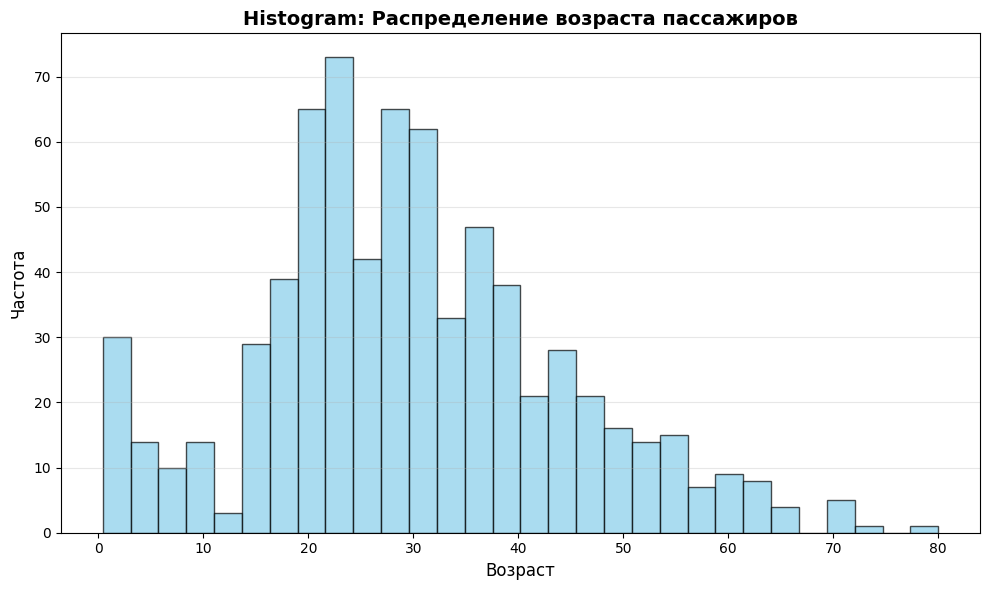

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df_combined[age_col_viz].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram: Распределение возраста пассажиров', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

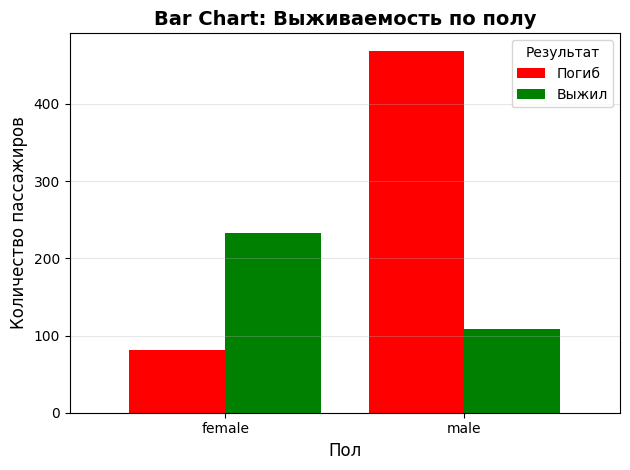

In [14]:
df_sex = df_combined.dropna(subset=[survived_col_viz, sex_col_use]).copy()
survival_by_sex = df_sex.groupby([sex_col_use, survived_col_viz]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
survival_by_sex.plot(kind='bar', color=['red', 'green'], width=0.8)
plt.title('Bar Chart: Выживаемость по полу', fontsize=14, fontweight='bold')
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Погиб', 'Выжил'], title='Результат')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


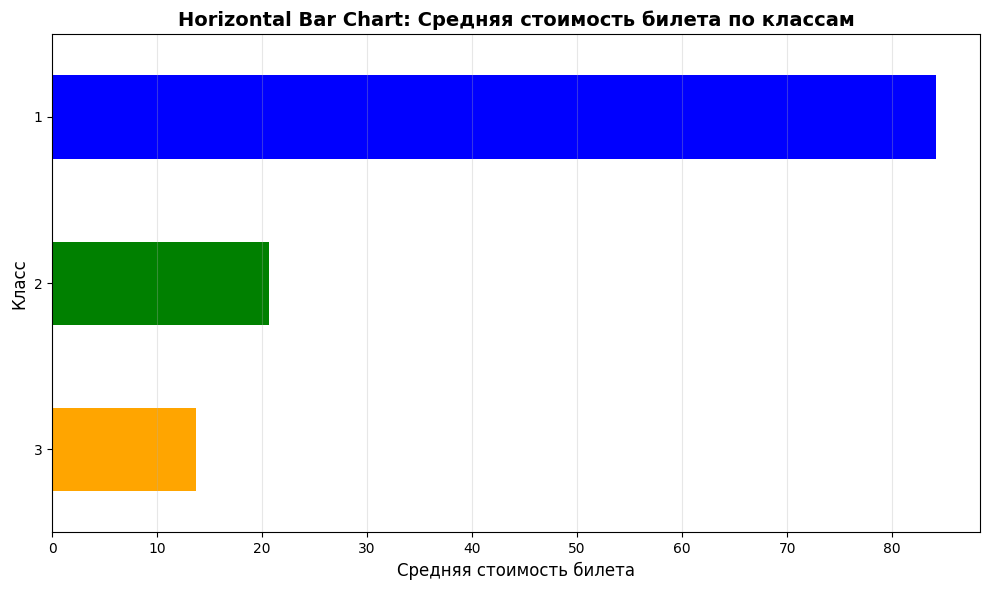

In [15]:
df_fare = df_combined.dropna(subset=[fare_col_viz, class_col_use]).copy()
avg_fare_by_class = df_fare.groupby(class_col_use)[fare_col_viz].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_fare_by_class.plot(kind='barh', color=['orange', 'green', 'blue'])
plt.title('Horizontal Bar Chart: Средняя стоимость билета по классам', fontsize=14, fontweight='bold')
plt.xlabel('Средняя стоимость билета', fontsize=12)
plt.ylabel('Класс', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
class_counts = df_combined[class_col_use].value_counts()

fig = px.pie(
    values=class_counts.values,
    names=class_counts.index,
    title='Pie Chart: Распределение пассажиров по классам (интерактивный)'
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=700, height=600)
fig.show()


<Figure size 1000x600 with 0 Axes>

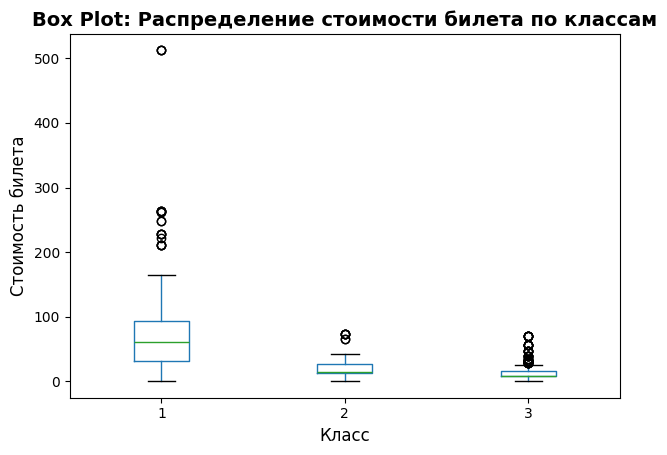

In [17]:
df_box = df_combined.dropna(subset=[fare_col_viz, class_col_use]).copy()
plt.figure(figsize=(10, 6))
df_box.boxplot(column=fare_col_viz, by=class_col_use, grid=False)
plt.title('Box Plot: Распределение стоимости билета по классам', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Стоимость билета', fontsize=12)
plt.tight_layout()
plt.show()


In [18]:
df_sun = df_combined.dropna(subset=[class_col_use, sex_col_use, survived_col_viz]).copy()
sunburst_data = df_sun.groupby([class_col_use, sex_col_use, survived_col_viz]).size().reset_index(name='count')
sunburst_data['survived_label'] = sunburst_data[survived_col_viz].map({0: 'Погиб', 1: 'Выжил'})

fig = px.sunburst(
    sunburst_data,
    path=[class_col_use, sex_col_use, 'survived_label'],
    values='count',
    title='Sunburst Chart: Иерархия Класс -> Пол -> Выживаемость (интерактивный)'
)
fig.update_layout(width=800, height=800)
fig.show()


In [19]:
df_3d = df_combined.copy()
df_3d['total_relatives'] = df_3d['SibSp'].fillna(0) + df_3d['Parch'].fillna(0)

df_3d_clean = df_3d.dropna(subset=[age_col_viz, fare_col_viz, 'total_relatives', survived_col_viz])
hover_cols_3d = ['Pclass', 'Sex']

fig = px.scatter_3d(
    df_3d_clean,
    x=age_col_viz,
    y=fare_col_viz,
    z='total_relatives',
    color=survived_col_viz,
    size=fare_col_viz,
    hover_data=hover_cols_3d,
    title='3D Scatter Plot: Возраст, Стоимость билета, Количество родных (интерактивный 3D)',
    labels={age_col_viz: 'Возраст', fare_col_viz: 'Стоимость билета', 'total_relatives': 'Количество родных', survived_col_viz: 'Выжил'}
)
fig.update_layout(width=900, height=700)
fig.show()


In [20]:
numeric_cols = df_combined.select_dtypes(include=[np.number]).columns
correlation_matrix = df_combined[numeric_cols].corr()

fig = px.imshow(
    correlation_matrix,
    labels=dict(x="Признак", y="Признак", color="Корреляция"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='RdBu',
    title='Heatmap: Корреляционная матрица (интерактивный)',
    aspect="auto"
)
fig.update_layout(width=800, height=700)
fig.show()


In [21]:
# Sankey Diagram: Поток от класса через пол к выживаемости
df_sankey = df_combined.dropna(subset=[class_col_use, sex_col_use, survived_col_viz]).copy()

if df_sankey[survived_col_viz].dtype.name == 'category':
    df_sankey['survived_numeric'] = pd.to_numeric(df_sankey[survived_col_viz].astype(str), errors='coerce')
else:
    df_sankey['survived_numeric'] = pd.to_numeric(df_sankey[survived_col_viz], errors='coerce')

class_to_sex = df_sankey.groupby([class_col_use, sex_col_use]).size().reset_index(name='count')
sex_to_survived = df_sankey.groupby([sex_col_use, 'survived_numeric']).size().reset_index(name='count')
sex_to_survived['survived_label'] = sex_to_survived['survived_numeric'].map({0.0: 'Погиб', 1.0: 'Выжил'})

all_nodes = []
all_nodes.extend(df_sankey[class_col_use].unique())
all_nodes.extend(df_sankey[sex_col_use].unique())
all_nodes.extend(['Погиб', 'Выжил'])

node_labels = list(dict.fromkeys(all_nodes))
node_indices = {label: idx for idx, label in enumerate(node_labels)}

source = []
target = []
value = []

for _, row in class_to_sex.iterrows():
    source.append(node_indices[row[class_col_use]])
    target.append(node_indices[row[sex_col_use]])
    value.append(row['count'])

for _, row in sex_to_survived.iterrows():
    if pd.notna(row['survived_label']):
        source.append(node_indices[row[sex_col_use]])
        target.append(node_indices[row['survived_label']])
        value.append(row['count'])

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="lightblue"
    )
)])

fig.update_layout(
    title_text="Sankey Diagram: Поток от класса через пол к выживаемости",
    font_size=12,
    width=1000,
    height=600
)
fig.show()


### Результаты блока 3: Визуализация

**Выполнено:**
- Построено 10 различных графиков + 1 дополнительный (Sankey diagram)
- 6 интерактивных графиков (требовалось 5)
- 1 3D график (график 9: 3D Scatter plot)
- Все требуемые типы графиков:
  - Scatter plot
  - Linear plot (with several lines)
  - Histogram
  - Bar chart
  - Horizontal bar chart
  - Pie chart
  - Box chart
  - Sunburst chart
  - 3D Scatter plot
  - Heatmap
  - Sankey diagram (дополнительно)
